In [1]:

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
cd drive/My\ Drive/Music

/content/drive/My Drive/Music


In [ ]:
from IPython.display import clear_output
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz
clear_output()

In [ ]:
!tar -xvf genres.tar.gz
clear_output()

# Reference
Initial workflow is referenced heavily from https://gist.github.com/parulnith/7f8c174e6ac099e86f0495d3d9a4c01e#file-music_genre_classification-ipynb

In [ ]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Torch
import torch
import torchvision.models as models

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install librosa
clear_output()

In [ ]:
import librosa
audio_path = 'genres/pop/pop.00020.wav'
x , sr = librosa.load(audio_path)

In [ ]:
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
print(x.shape, sr)

(661504,) 22050


In [ ]:
librosa.load(audio_path, sr=44100)

(array([-0.16494873, -0.15485062, -0.13102113, ..., -0.07500307,
        -0.06307442, -0.03590256], dtype=float32), 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

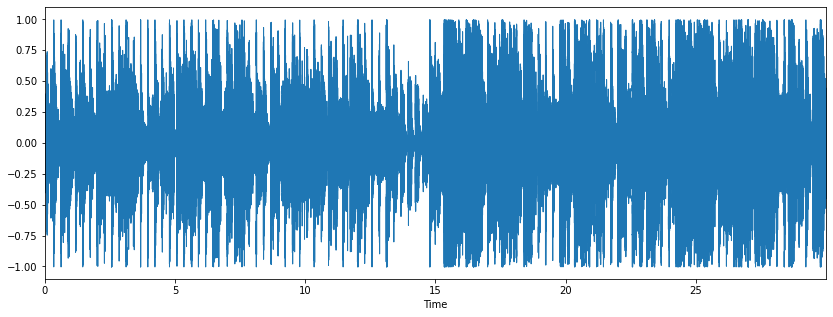

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

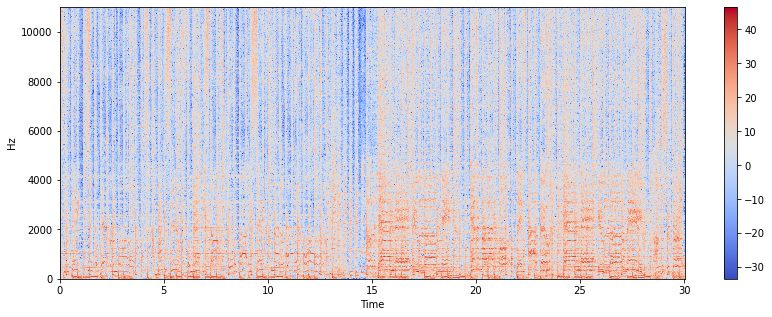

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

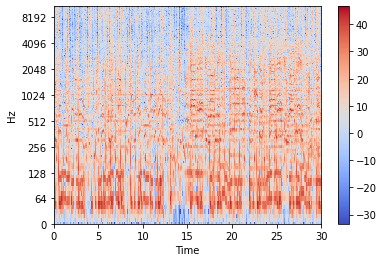

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 HzPlaying the audio
ipd.Audio(x, rate=sr) # load a NumPy arraySaving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

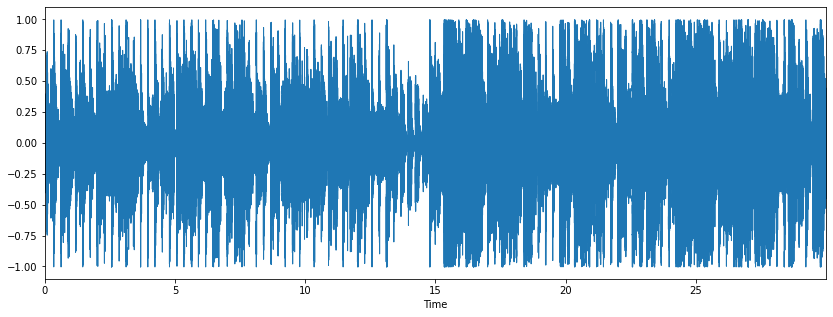

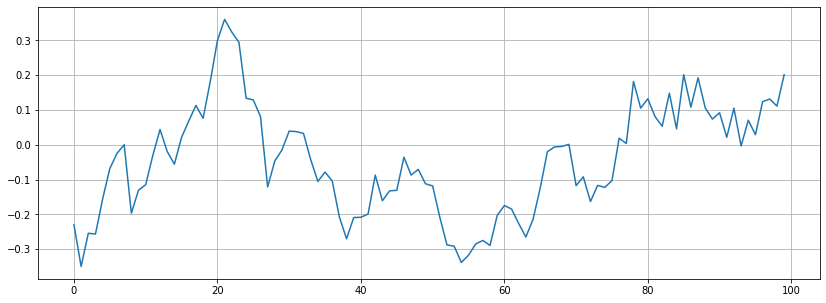

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

13


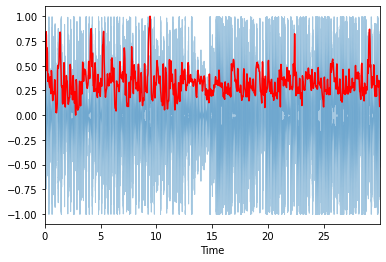

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

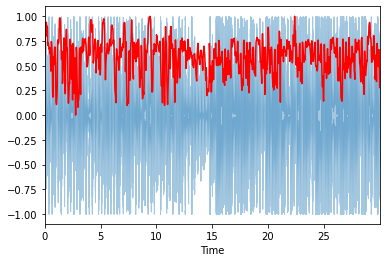

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

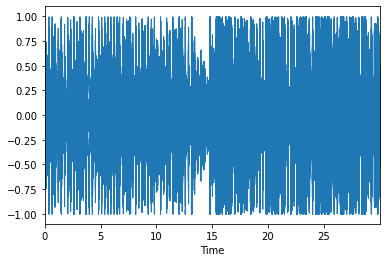

In [ ]:
librosa.display.waveplot(x, sr=sr)

In [ ]:
x, fs = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)

(20, 1293)


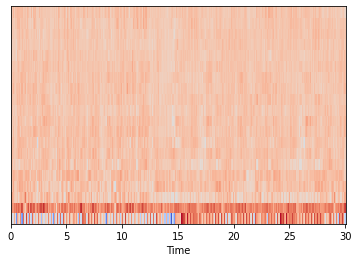

In [ ]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 8.79248552e-17  6.31959896e-17  2.19812138e-17  6.59436414e-17
 -5.49530345e-17  0.00000000e+00 -4.94577310e-17 -4.39624276e-17
 -5.49530345e-18 -3.29718207e-17 -1.09906069e-17 -1.09906069e-17
  0.00000000e+00 -2.19812138e-17 -3.98409500e-17 -4.94577310e-17
  0.00000000e+00  0.00000000e+00  2.19812138e-17 -3.29718207e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


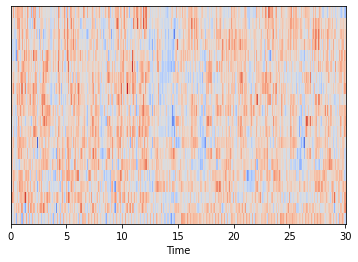

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

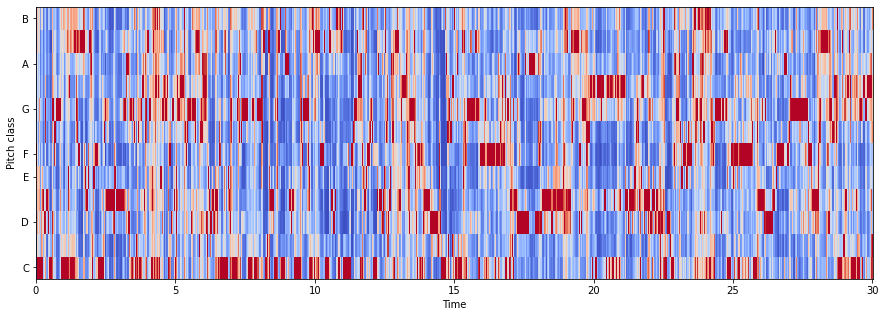

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [ ]:
ls

01_Minh_EDA.ipynb  genres.tar.gz  music_speech/        tone_220.wav
genres/            img_data/      music_speech.tar.gz


In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'genres/{g}'):
        songname = f'genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

# LOAD IMAGE

In [7]:
pip install split-folders tqdm

In [8]:
import split_folders

In [9]:
split_folders.ratio('img_data', output="spectrogram", seed=1337, ratio=(.8, .1, .1))

Copying files: 1000 files [13:33,  1.23 files/s]


In [26]:
from PIL import Image
import torchvision.transforms as transforms
import os
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torch
import numpy as np
import pandas as pd

In [15]:
def load_image(img_path):
    image = Image.open(img_path).convert('RGB')
      
    in_transform = transforms.Compose([
                        transforms.Resize(224),
                        transforms.CenterCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    return image

In [16]:
data = 'spectrogram/'
train = os.path.join(data, 'train/')
test = os.path.join(data, 'test/')
validation = os.path.join(data, 'val/')
workers = 0
batch = 32


all_transforms = {
    'train' : transforms.Compose([transforms.Resize(224),
                                  transforms.CenterCrop(224),
                                  transforms.RandomVerticalFlip(),
                                  transforms.RandomRotation(10),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])]),
    
    'test' : transforms.Compose([transforms.Resize(224),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])]),
    'validation' : transforms.Compose([transforms.Resize(224),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])]),
    }
transformed_dataset = {'train' : datasets.ImageFolder(root=train,transform=all_transforms['train']),
                  'test' : datasets.ImageFolder(root=test,transform=all_transforms['test']),
                 'validation' : datasets.ImageFolder(root=validation,transform=all_transforms['validation'])}

data_loaders = {'train' : torch.utils.data.DataLoader(transformed_dataset['train'],batch_size = batch, num_workers = workers, shuffle=True),
                    'test' : torch.utils.data.DataLoader(transformed_dataset['test'],batch_size = batch, num_workers = workers),
               'validation' : torch.utils.data.DataLoader(transformed_dataset['validation'],batch_size = batch, num_workers = workers)}


In [17]:
num_class = transformed_dataset['train'].classes
print(len(num_class))
print('Size train: ',len(transformed_dataset['train']))
print('Size test: ',len(transformed_dataset['test']))
print('Size validation: ',len(transformed_dataset['validation']))

10
Size train:  800
Size test:  100
Size validation:  100


In [20]:

import torchvision.models as models
import torch.nn as nn
model_transfer=models.resnet50(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False
input_before_last= model_transfer.fc.in_features
modified_layer = nn.Linear(input_before_last, 10)
model_transfer.fc = modified_layer 
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()



In [32]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

In [30]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['validation']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()*data.size(0)

        train_loss = train_loss/len(loaders['train'].dataset) 
        valid_loss = valid_loss/len(loaders['validation'].dataset) 
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss has been decrasing ({:.3f} --> {:.3f})'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [34]:
epochs = 50
model_transfer = train(epochs, data_loaders, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.288511 	Validation Loss: 1.514343
Validation loss has been decrasing (inf --> 1.514)
Epoch: 2 	Training Loss: 1.298392 	Validation Loss: 1.394648
Validation loss has been decrasing (1.514 --> 1.395)
Epoch: 3 	Training Loss: 1.260417 	Validation Loss: 1.428276
Epoch: 4 	Training Loss: 1.299954 	Validation Loss: 1.457146
Epoch: 5 	Training Loss: 1.238577 	Validation Loss: 1.431800
Epoch: 6 	Training Loss: 1.217367 	Validation Loss: 1.450079
Epoch: 7 	Training Loss: 1.221333 	Validation Loss: 1.473516
Epoch: 8 	Training Loss: 1.249012 	Validation Loss: 1.390380
Validation loss has been decrasing (1.395 --> 1.390)
Epoch: 9 	Training Loss: 1.293922 	Validation Loss: 1.440097
Epoch: 10 	Training Loss: 1.193350 	Validation Loss: 1.410606
Epoch: 11 	Training Loss: 1.194406 	Validation Loss: 1.435158
Epoch: 12 	Training Loss: 1.225815 	Validation Loss: 1.479672
Epoch: 13 	Training Loss: 1.230063 	Validation Loss: 1.430396
Epoch: 14 	Training Loss: 1.224573 	Validation

<All keys matched successfully>

In [35]:
test(data_loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.637053


Test Accuracy: 47% (47/100)
